In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import h3
import cartopy.crs as ccrs


C:\Users\wutian\AppData\Local\Temp\ipykernel_49192\2915223035.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(lon, lat, variable)


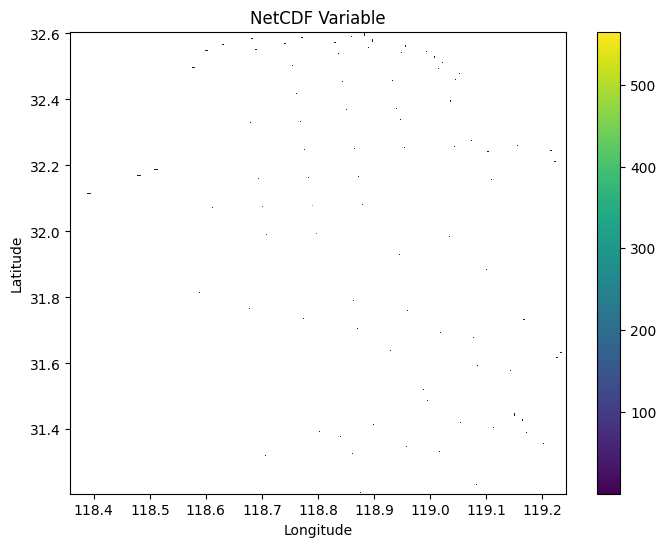

In [6]:
# 读取nc文件
ds = xr.open_dataset('filename.nc')

# 选择一个变量作为颜色映射
variable = ds['count']

# 创建画布和地图投影
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# 绘制面数据
for i in range(ds.dims['hex']):
    face = ds['hex'][i].values
    ax.add_geometries(face, crs=ccrs.PlateCarree(),
                      facecolor=plt.cm.jet(variable[i].values))

# 添加海岸线和边界
ax.coastlines(resolution='50m', color='black')
ax.add_feature(ccrs.cartopy.feature.BORDERS)

# 设置标题和颜色映射
plt.title('Temperature')
plt.colorbar(orientation='horizontal', fraction=0.04, pad=0.1)

# 显示图像
plt.show()


In [5]:
data

<xarray.Dataset>
Dimensions:  (lat: 1919, lon: 1919)
Coordinates:
  * lat      (lat) float64 31.2 31.21 31.21 31.21 31.21 ... 32.6 32.6 32.6 32.61
  * lon      (lon) float64 118.4 118.4 118.4 118.4 ... 119.2 119.2 119.2 119.2
Data variables:
    hex7     (lat, lon) object ...
    cnt      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [11]:
import netCDF4 as nc
import matplotlib.pyplot as plt

# 读取nc文件
dataset = nc.Dataset('output1.nc')

# 获取变量
var = dataset.variables['vars']

# 获取经度、纬度和变量数据
lon = dataset.variables['lon'][:]
lat = dataset.variables['lat'][:]
data = var[:]

# 绘制地图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
plt.pcolormesh(lon, lat, data)
plt.colorbar()
plt.title('Title')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


KeyError: 'lon'

In [10]:
dataset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): rows(1919), vars(1)
    variables(dimensions): int32 rows(rows), int32 vars(vars), float32 data(rows, vars)
    groups: 